In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize


In [31]:

path= "/itet-stor/himeva/net_scratch/fullres_data/fold1/train/normal/"
data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)

(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)

In [34]:
path= "/itet-stor/himeva/net_scratch/fullres_data/fold1/val/normal/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)

(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)


In [21]:
for i in choices:
    os.rename(path+i , "/itet-stor/himeva/net_scratch/fullres_data/fold1/val/normal/"+i)

In [35]:
X = np.array(data['data'])
y = np.array(data['label'])

In [36]:
X.shape, y.shape

((729, 320, 320), (729,))

In [51]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

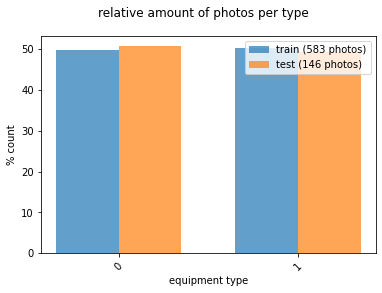

In [38]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [52]:
X_train_reshape= X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])

In [53]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
scalify = StandardScaler()
X_train_prepared = scalify.fit_transform(X_train_reshape)

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)


SGDClassifier(random_state=42)

In [55]:
X_test_reshape= X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2])
X_test_prepared = scalify.transform(X_test_reshape)

In [56]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False False  True False False  True  True  True  True  True False  True
 False  True False  True  True  True  True  True  True False False  True
  True]

Percentage correct:  75.34246575342466


In [57]:
from sklearn.metrics import confusion_matrix
cmx = confusion_matrix(y_test, y_pred)
cmx

array([[58, 16],
       [20, 52]])

In [59]:
from sklearn import datasets, svm, metrics
clf2 = svm.SVC(gamma=0.001)
clf2.fit(X_train_reshape, y_train)

SVC(gamma=0.001)

In [60]:
predicted = clf2.predict(X_test_reshape)
print(f"Classification report for classifier {clf2}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.70      0.69      0.69        74
           1       0.68      0.69      0.69        72

    accuracy                           0.69       146
   macro avg       0.69      0.69      0.69       146
weighted avg       0.69      0.69      0.69       146




Confusion matrix:
[[51 23]
 [22 50]]


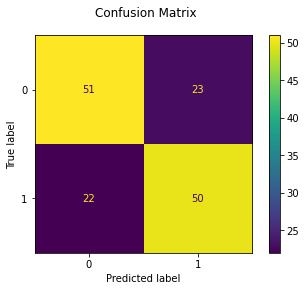

In [61]:
disp = metrics.plot_confusion_matrix(clf2, X_test_reshape, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


Classification report for classifier MLPClassifier():
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        74
           1       0.64      0.71      0.67        72

    accuracy                           0.66       146
   macro avg       0.66      0.66      0.66       146
weighted avg       0.66      0.66      0.66       146


Confusion matrix:
[[45 29]
 [21 51]]


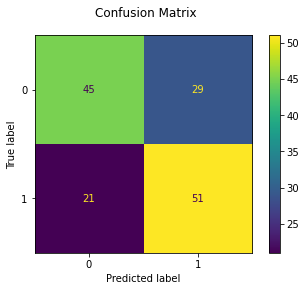

In [63]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier()
clf3.fit(X_train_reshape, y_train)
predicted = clf3.predict(X_test_reshape)
print(f"Classification report for classifier {clf3}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")
disp = metrics.plot_confusion_matrix(clf3, X_test_reshape, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()




In [66]:
path= "/itet-stor/himeva/net_scratch/x2_data/train/normal/"
data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x2_data/val/normal/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)


In [67]:
path= "/itet-stor/himeva/net_scratch/x2_data/train/lesion/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x2_data/val/lesion/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)


In [70]:
X = np.array(data['data'])
y = np.array(data['label'])
 
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)
X_train2_reshape= X_train2.reshape(X_train2.shape[0], X_train2.shape[1]* X_train2.shape[2])
scalify = StandardScaler()
X_train2_prepared = scalify.fit_transform(X_train2_reshape)

sgd_clf2 = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf2.fit(X_train2_prepared, y_train2)
X_test2_reshape= X_test2.reshape(X_test2.shape[0], X_test2.shape[1]* X_test2.shape[2])
X_test2_prepared = scalify.transform(X_test2_reshape)
y_pred2 = sgd_clf2.predict(X_test2_prepared)
cmx = confusion_matrix(y_test2, y_pred2)
print(cmx)


[[75  8]
 [ 8 56]]


In [71]:

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)
X_test_reshape= X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2])
X_test_prepared = scalify.transform(X_test_reshape)
y_pred = sgd_clf.predict(X_test_prepared)
cmx = confusion_matrix(y_test, y_pred)


In [72]:
print(cmx)

[[73  1]
 [43 29]]


In [82]:
data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   
path= "/itet-stor/himeva/net_scratch/x3_data/train/lesion/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x3_data/val/lesion/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)

path= "/itet-stor/himeva/net_scratch/x3_data/train/normal/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x3_data/val/normal/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)


In [83]:
X = np.array(data['data'])
y = np.array(data['label'])
 
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)
X_train3_reshape= X_train3.reshape(X_train3.shape[0], X_train3.shape[1]* X_train3.shape[2])
scalify = StandardScaler()
X_train3_prepared = scalify.fit_transform(X_train3_reshape)

sgd_clf3 = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf3.fit(X_train3_prepared, y_train3)
X_test3_reshape= X_test3.reshape(X_test3.shape[0], X_test3.shape[1]* X_test3.shape[2])
X_test3_prepared = scalify.transform(X_test3_reshape)
y_pred3 = sgd_clf3.predict(X_test3_prepared)
cmx = confusion_matrix(y_test3, y_pred3)
print(cmx)

print(f"Classification report for classifier {sgd_clf3}:\n"
      f"{metrics.classification_report(y_test3, y_pred3)}\n")

[[60  6]
 [13 67]]
Classification report for classifier SGDClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        66
           1       0.92      0.84      0.88        80

    accuracy                           0.87       146
   macro avg       0.87      0.87      0.87       146
weighted avg       0.87      0.87      0.87       146




In [84]:
data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   
path= "/itet-stor/himeva/net_scratch/x4_data/train/lesion/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x4_data/val/lesion/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)

path= "/itet-stor/himeva/net_scratch/x4_data/train/normal/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x4_data/val/normal/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)


In [85]:
X = np.array(data['data'])
y = np.array(data['label'])
 
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)
X_train4_reshape= X_train4.reshape(X_train4.shape[0], X_train4.shape[1]* X_train4.shape[2])
scalify = StandardScaler()
X_train4_prepared = scalify.fit_transform(X_train4_reshape)

sgd_clf4 = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf4.fit(X_train4_prepared, y_train4)
X_test4_reshape= X_test4.reshape(X_test4.shape[0], X_test4.shape[1]* X_test4.shape[2])
X_test4_prepared = scalify.transform(X_test4_reshape)
y_pred4 = sgd_clf4.predict(X_test4_prepared)
cmx = confusion_matrix(y_test4, y_pred4)
print(cmx)

print(f"Classification report for classifier {sgd_clf4}:\n"
      f"{metrics.classification_report(y_test4, y_pred4)}\n")

[[62  4]
 [18 62]]
Classification report for classifier SGDClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        66
           1       0.94      0.78      0.85        80

    accuracy                           0.85       146
   macro avg       0.86      0.86      0.85       146
weighted avg       0.87      0.85      0.85       146




In [86]:
data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   
path= "/itet-stor/himeva/net_scratch/x5_data/train/lesion/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x5_data/val/lesion/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)

path= "/itet-stor/himeva/net_scratch/x5_data/train/normal/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x5_data/val/normal/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)


In [87]:
X = np.array(data['data'])
y = np.array(data['label'])
 
X_train5, X_test5, y_train5, y_test5= train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)
X_train5_reshape= X_train5.reshape(X_train5.shape[0], X_train5.shape[1]* X_train5.shape[2])
scalify = StandardScaler()
X_train5_prepared = scalify.fit_transform(X_train5_reshape)

sgd_clf5 = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf5.fit(X_train5_prepared, y_train5)
X_test5_reshape= X_test5.reshape(X_test5.shape[0], X_test5.shape[1]* X_test5.shape[2])
X_test5_prepared = scalify.transform(X_test5_reshape)
y_pred5 = sgd_clf5.predict(X_test5_prepared)
cmx = confusion_matrix(y_test5, y_pred5)
print(cmx)

print(f"Classification report for classifier {sgd_clf5}:\n"
      f"{metrics.classification_report(y_test5, y_pred5)}\n")

[[60  6]
 [12 68]]
Classification report for classifier SGDClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        66
           1       0.92      0.85      0.88        80

    accuracy                           0.88       146
   macro avg       0.88      0.88      0.88       146
weighted avg       0.88      0.88      0.88       146




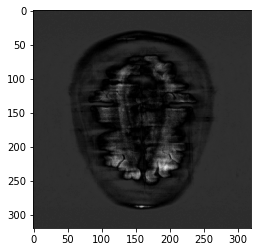

In [93]:
plt.imshow(X_train4[23],cmap="gray")

In [96]:
data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   
path= "/itet-stor/himeva/net_scratch/x7_data/train/lesion/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x7_data/val/lesion/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)

path= "/itet-stor/himeva/net_scratch/x7_data/train/normal/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x7_data/val/normal/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)


In [98]:
X = np.array(data['data'])
y = np.array(data['label'])
 
X_train7, X_test7, y_train7, y_test7= train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)
X_train7_reshape= X_train7.reshape(X_train7.shape[0], X_train7.shape[1]* X_train7.shape[2])
scalify = StandardScaler()
X_train7_prepared = scalify.fit_transform(X_train7_reshape)

sgd_clf7 = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf7.fit(X_train7_prepared, y_train7)
X_test7_reshape= X_test7.reshape(X_test7.shape[0], X_test7.shape[1]* X_test7.shape[2])
X_test7_prepared = scalify.transform(X_test7_reshape)
y_pred7 = sgd_clf7.predict(X_test7_prepared)
cmx = confusion_matrix(y_test7, y_pred7)
print(cmx)

print(f"Classification report for classifier {sgd_clf7}:\n"
      f"{metrics.classification_report(y_test7, y_pred7)}\n")

[[60  6]
 [14 66]]
Classification report for classifier SGDClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        66
           1       0.92      0.82      0.87        80

    accuracy                           0.86       146
   macro avg       0.86      0.87      0.86       146
weighted avg       0.87      0.86      0.86       146




In [100]:
data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   
path= "/itet-stor/himeva/net_scratch/x8_data/train/lesion/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x8_data/val/lesion/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)

path= "/itet-stor/himeva/net_scratch/x8_data/train/normal/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/x8_data/val/normal/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)


In [101]:
X = np.array(data['data'])
y = np.array(data['label'])
 
X_train8, X_test8, y_train8, y_test8= train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)
X_train8_reshape= X_train8.reshape(X_train8.shape[0], X_train8.shape[1]* X_train8.shape[2])
scalify = StandardScaler()
X_train8_prepared = scalify.fit_transform(X_train8_reshape)

sgd_clf8 = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf8.fit(X_train8_prepared, y_train8)
X_test8_reshape= X_test8.reshape(X_test8.shape[0], X_test8.shape[1]* X_test8.shape[2])
X_test8_prepared = scalify.transform(X_test8_reshape)
y_pred8 = sgd_clf8.predict(X_test8_prepared)
cmx = confusion_matrix(y_test8, y_pred8)
print(cmx)

print(f"Classification report for classifier {sgd_clf8}:\n"
      f"{metrics.classification_report(y_test8, y_pred8)}\n")

[[61  5]
 [14 66]]
Classification report for classifier SGDClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.81      0.92      0.87        66
           1       0.93      0.82      0.87        80

    accuracy                           0.87       146
   macro avg       0.87      0.87      0.87       146
weighted avg       0.88      0.87      0.87       146




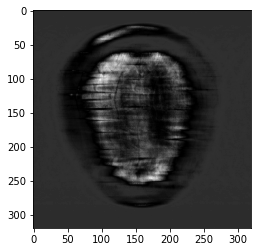

In [103]:
plt.imshow(X_test8[0], cmap="gray")

In [13]:
data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   
path= "/itet-stor/himeva/net_scratch/fullres_data/train/lesion/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/fullres_data/val/lesion/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(1)
        data['filename'].append(file)
        data['data'].append(im)

path= "/itet-stor/himeva/net_scratch/fullres_data/train/normal/"

# read all images in PATH, resize and write to DESTINATION_PATH

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)
path= "/itet-stor/himeva/net_scratch/fullres_data/val/normal/"

for file in os.listdir(path):
    if file[-3:] in {'jpg', 'png'}:
        im = imread(os.path.join(path, file))[:,:,0]
        #print(im.shape)
        im = resize(im, (320, 320)) #[:,:,::-1]
        data['label'].append(0)
        data['filename'].append(file)
        data['data'].append(im)


In [105]:
X = np.array(data['data'])
y = np.array(data['label'])
 
X_train8, X_test8, y_train8, y_test8= train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)
X_train8_reshape= X_train8.reshape(X_train8.shape[0], X_train8.shape[1]* X_train8.shape[2])
scalify = StandardScaler()
X_train8_prepared = scalify.fit_transform(X_train8_reshape)

sgd_clf8 = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf8.fit(X_train8_prepared, y_train8)
X_test8_reshape= X_test8.reshape(X_test8.shape[0], X_test8.shape[1]* X_test8.shape[2])
X_test8_prepared = scalify.transform(X_test8_reshape)
y_pred8 = sgd_clf8.predict(X_test8_prepared)
cmx = confusion_matrix(y_test8, y_pred8)
print(cmx)

print(f"Classification report for classifier {sgd_clf8}:\n"
      f"{metrics.classification_report(y_test8, y_pred8)}\n")

[[65  1]
 [ 6 74]]
Classification report for classifier SGDClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        66
           1       0.99      0.93      0.95        80

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146




In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [15]:
X = np.array(data['data'])
X= X.reshape(X.shape[0], X.shape[1]* X.shape[2])

y = np.array(data['label'])

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
            edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

NameError: name 'datasets' is not defined

In [9]:
data

{'label': [], 'filename': [], 'data': []}